# Evaluation


## 1. Purpose
- We compared the performance across models (baseline, cross-validation results, and test predictions).
- Visualized results to determine the best-performing model based on:
  - Cross-validation (CV) metrics.
  - Test set prediction results.
- Ensured consistency between the CV-selected model and test set results.

## 2. Steps

### Step 1: Load Results
- Loaded saved metrics for:
  - Cross-validation results (mean and standard deviation).
  - Test set predictions for each model.
  
### Step 2: Comparative Plots
#### **Cross-Validation Metrics**
- Created a **bar chart** comparing the mean CV scores of all models.
- Discussed which model performs the best in CV and its stability.

#### **Test Set Predictions**
- Created a **bar chart** to compare performance metrics (e.g., accuracy, F1-score, AUC-ROC) across models on the test set.
- Highlight if the best CV model aligns with the best test set results.

### Step 3: Consistency Check
- Compared the model chosen based on CV with the one performing best on the test set.

### Step 4: Feature Importance
- Plotted feature importance (e.g., for Random Forest, XGBoost) to visualize which features contribute the most to the predictions.

### Step 5: Final Decision
- Based on the plots and analysis, decided on the best-performing model.
- Documented why this model is preferred (e.g., consistency across CV and test, interpretability, etc.).

## Brief Evaluation Summary

- **Is the evaluation stratified?**
  - Yes, we defined the test and train split as stratified in `3_preprocessing/7_dataset_splitting.ipynb` and applied cross-validation on each method in the `4_analysis`.

- **Cost matrix or not?**
  - This needs to be provided. We aim to identify as many customers that could potentially churn (predicted Churn = 1) and convince them to stay (churn = 0). If a customer is not actually going to churn but we have predicted churn (=1), it is not an issue if additional marketing strategies are applied to make them stay. Therefore, a False Positive is not bad, but a False Negative is problematic. If a customer is going to churn but we did not predict it, this is a significant issue. Hence, FN should be low and recall should be high.

- **Are the tests systematic?**
  - Yes, they are. All evaluation metrics are applied on the cross-validation in the training and also on the prediction set.

- **Analyze a symbolic model (how does the decision tree / rules look like)**
  - This is defined together with the baseline prediction in `baseline.ipynb`.

- **What features have a high impact on the result?**
  - Analyzed for SVM and XGBoost in the corresponding files and evaluated here.

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)

## Import data

In [141]:
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

In [142]:
# List of tuples containing model names and their corresponding file paths
files = [
    ("Logistic Regression CV", "../2_data/evaluation_metrics/LogisticRegression_cv.csv"),
    ("Logistic Regression Prediction", "../2_data/evaluation_metrics/LogisticRegression_prediction.csv"),
    ("Random Forest CV", "../2_data/evaluation_metrics/RandomForest_cv.csv"),
    ("Random Forest Prediction", "../2_data/evaluation_metrics/RandomForest_prediction.csv"),
    ("XGBoost CV", "../2_data/evaluation_metrics/XGBoost_cv.csv"),
    ("XGBoost Prediction", "../2_data/evaluation_metrics/XGBoost_prediction.csv"),
    ("Baseline Prediction", "../2_data/evaluation_metrics/Baseline_prediction.csv"),
    ("Baseline Random Prediction", "../2_data/evaluation_metrics/BaselineRandom_prediction.csv"),
    ("Baseline Rule Based Prediction", "../2_data/evaluation_metrics/BaselineRuleBased_prediction.csv"),
    ("Decision Tree CV", "../2_data/evaluation_metrics/DecisionTree_cv.csv"),
    ("Decision Tree Prediction", "../2_data/evaluation_metrics/DecisionTree_prediction.csv"),
    ("GNB CV", "../2_data/evaluation_metrics/GNB_cv.csv"),
    ("GNB Prediction", "../2_data/evaluation_metrics/GNB_prediction.csv"),
    ("KNN CV", "../2_data/evaluation_metrics/KNN_cv.csv"),
    ("KNN Prediction", "../2_data/evaluation_metrics/KNN_prediction.csv"),
    ("MLP CV", "../2_data/evaluation_metrics/MLP_cv.csv"),
    ("MLP Prediction", "../2_data/evaluation_metrics/MLP_prediction.csv"),
    ("MNB CV", "../2_data/evaluation_metrics/MNB_cv.csv"),
    ("MNB Prediction", "../2_data/evaluation_metrics/MNB_prediction.csv"),
    ("Nearest Centroid CV", "../2_data/evaluation_metrics/NearestCentroid_cv.csv"),
    ("Nearest Centroid Prediction", "../2_data/evaluation_metrics/NearestCentroid_prediction.csv"),
    ("SVM CV", "../2_data/evaluation_metrics/SVM_cv.csv"),
    ("SVM Prediction", "../2_data/evaluation_metrics/SVM_prediction.csv")
]

# Read predictions into a dictionary of DataFrames
results = {model: pd.read_csv(file) for model, file in files}

# Extract model names
model_names = [model for model, _ in files]


## Comparative Plots

## Cross-Validation Prediction

['Logistic Regression CV', 'Random Forest CV', 'XGBoost CV', 'Decision Tree CV', 'GNB CV', 'KNN CV', 'MLP CV', 'MNB CV', 'Nearest Centroid CV', 'SVM CV']


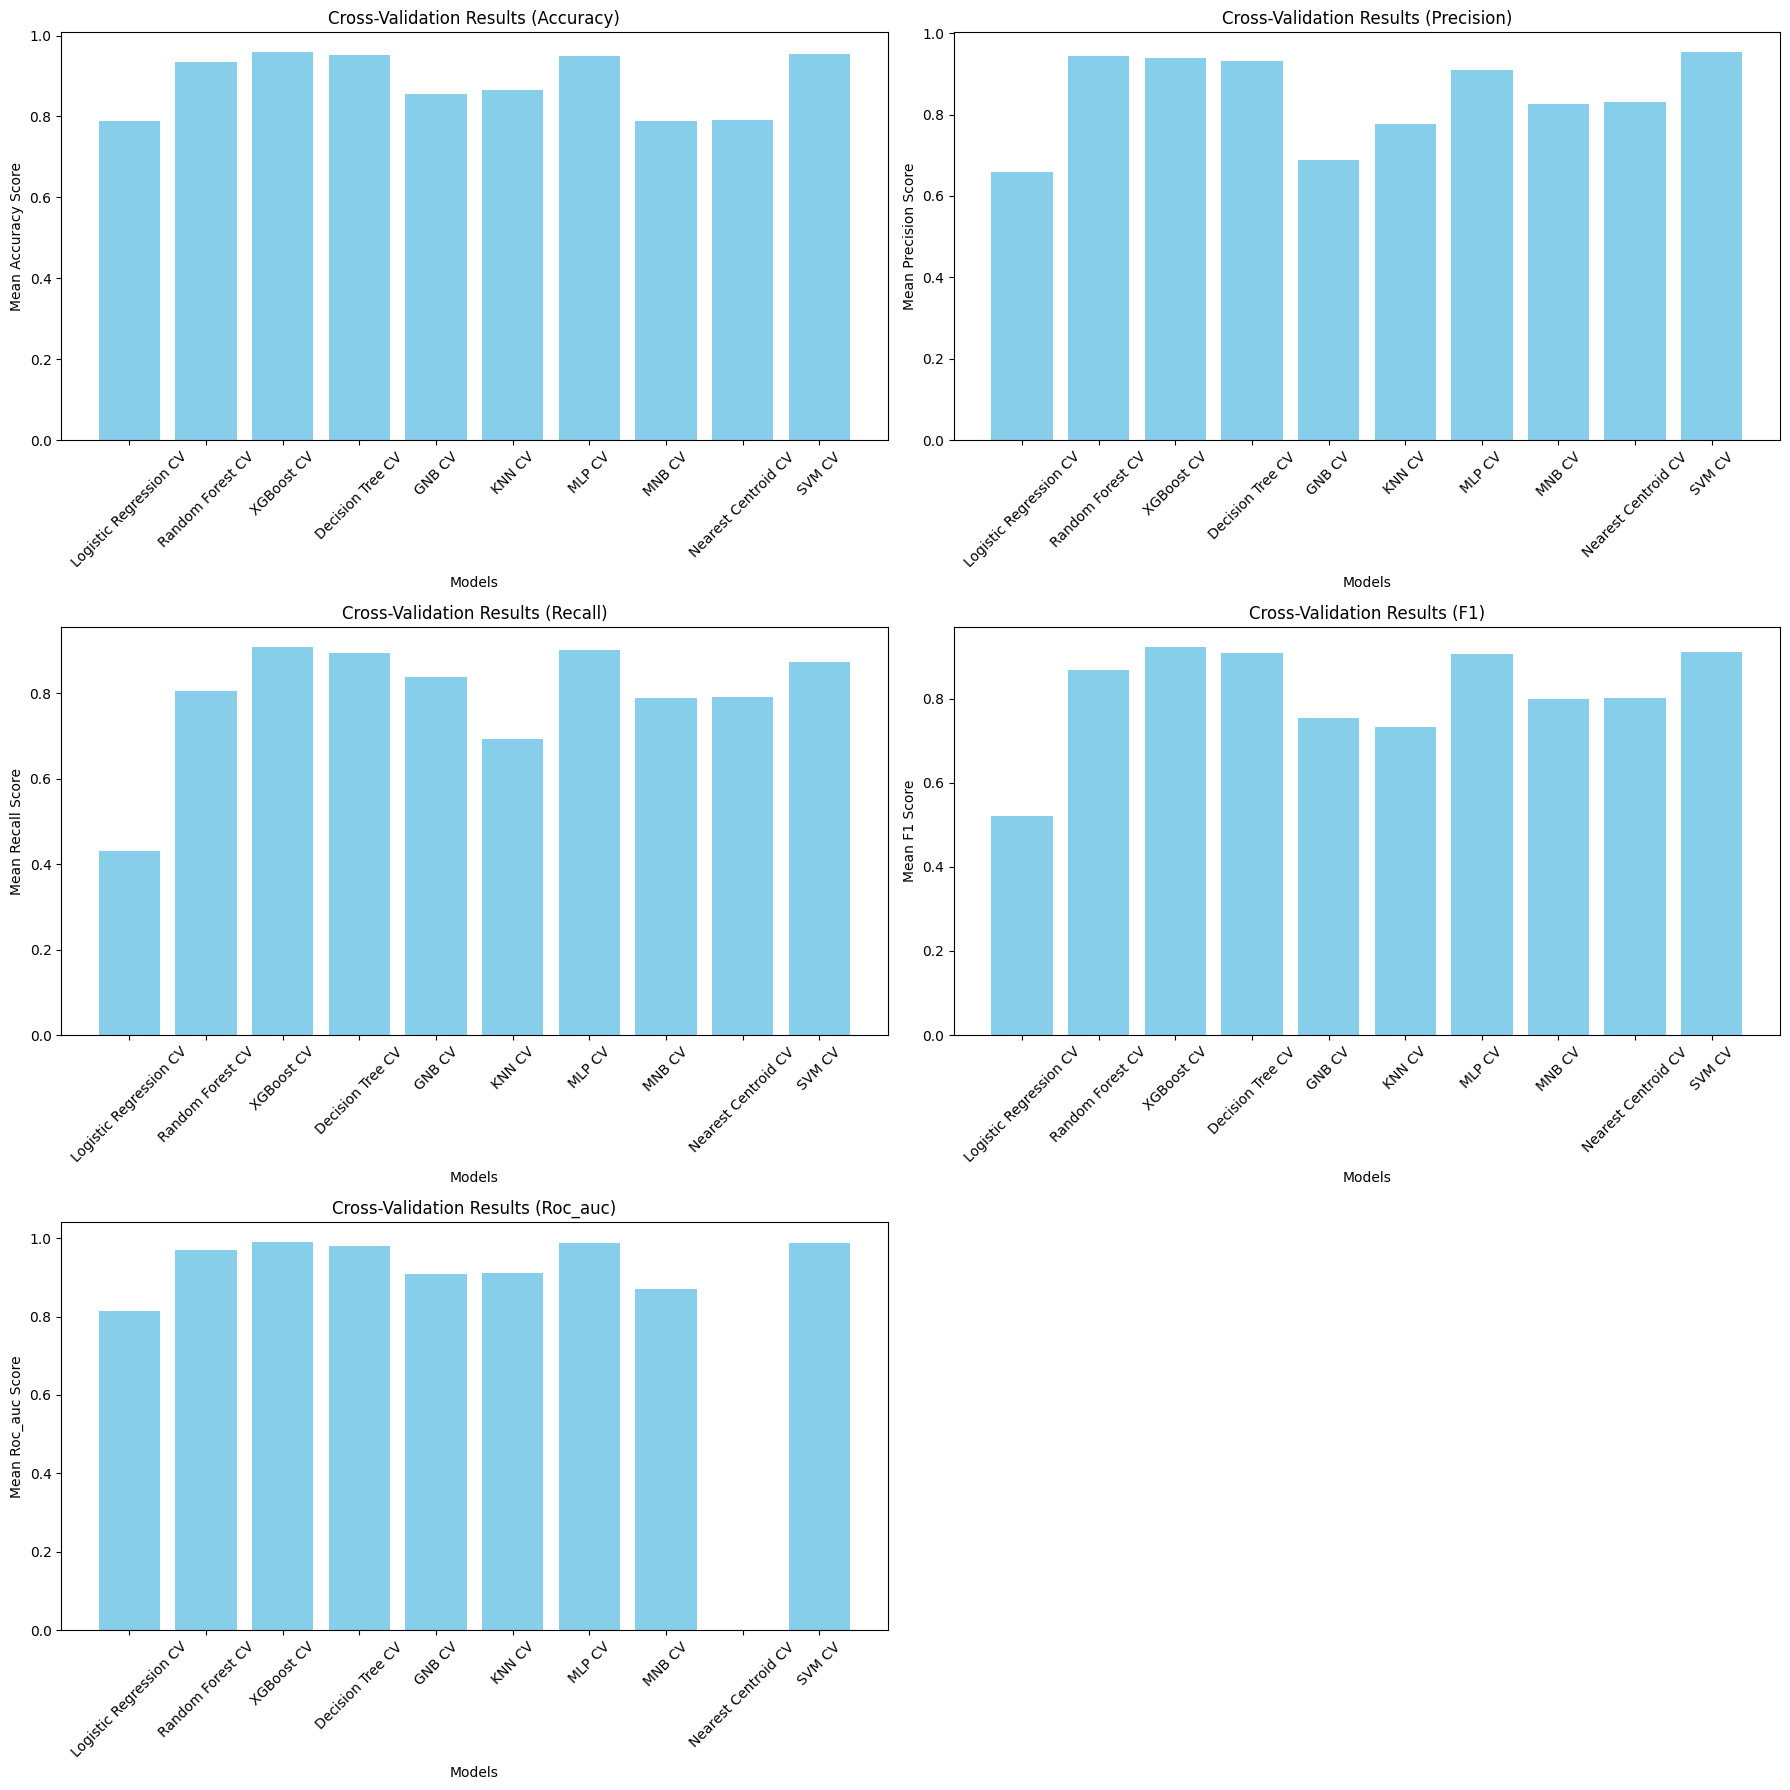

In [143]:
# Extract model names, mean scores, and standard deviations for CV models only
cv_model_names = [model for model in model_names if 'CV' in model and model in results]

print(cv_model_names)

# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(cv_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [144]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() for model in cv_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=cv_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                        accuracy  precision    recall        f1   roc_auc
XGBoost CV              0.960067   0.939163  0.908389  0.923462  0.990872
SVM CV                  0.955098   0.954556  0.872264  0.911376  0.987894
Decision Tree CV        0.952433   0.930946  0.894327  0.908329  0.979238
MLP CV                  0.949952   0.909706  0.901034  0.905235  0.988071
Random Forest CV        0.935214   0.944120  0.803987  0.867835  0.968690
Nearest Centroid CV     0.791794   0.830440  0.791794  0.801233       NaN
MNB CV                  0.788954   0.826572  0.788954  0.798408  0.870057
GNB CV                  0.855700   0.687729  0.836805  0.754561  0.908722
KNN CV                  0.865463   0.777933  0.691642  0.731722  0.910062
Logistic Regression CV  0.789674   0.658927  0.431459  0.520876  0.813409


The `roc_auc` value is currently not available due to an error encountered during its calculation.


### Qualitative Evaluation of Models Based on Cross-Validation Scores

#### XGBoost CV
- **F1 Score**: 0.923462
- **Accuracy**: 0.960067
- **Precision**: 0.939163
- **Recall**: 0.908389
- **ROC AUC**: 0.990872

**Evaluation**: XGBoost performs exceptionally well across all metrics, indicating its robustness and ability to handle complex relationships in the data. Its high precision and recall suggest it effectively balances false positives and false negatives. This performance can be attributed to its ability to handle non-linear relationships and interactions between features, as well as its robustness to overfitting due to regularization techniques.

#### SVM CV
- **F1 Score**: 0.911376
- **Accuracy**: 0.955098
- **Precision**: 0.954556
- **Recall**: 0.872264
- **ROC AUC**: 0.987894

**Evaluation**: SVM also shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind XGBoost in recall, suggesting it might miss some true positives. SVM's performance is likely due to its ability to find the optimal hyperplane that maximizes the margin between classes, but it might struggle with overlapping classes or require careful tuning of the kernel and regularization parameters.

#### Decision Tree CV
- **F1 Score**: 0.908329
- **Accuracy**: 0.952433
- **Precision**: 0.930946
- **Recall**: 0.894327
- **ROC AUC**: 0.979238

**Evaluation**: Decision Tree performs well but is prone to overfitting, which might explain its slightly lower recall compared to XGBoost and SVM. It is still a strong performer with good interpretability. The model's performance can be attributed to its ability to capture non-linear relationships, but it might overfit the training data, leading to slightly lower generalization performance.

#### MLP CV
- **F1 Score**: 0.905235
- **Accuracy**: 0.949952
- **Precision**: 0.909706
- **Recall**: 0.901034
- **ROC AUC**: 0.988071

**Evaluation**: MLP shows balanced performance across all metrics, indicating it can capture non-linear relationships well. Its performance is close to Decision Tree but with better generalization. The neural network's ability to learn complex patterns in the data contributes to its strong performance, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### Random Forest CV
- **F1 Score**: 0.867835
- **Accuracy**: 0.935214
- **Precision**: 0.944120
- **Recall**: 0.803987
- **ROC AUC**: 0.968690

**Evaluation**: Random Forest performs well but has a lower recall, indicating it might miss some true positives. Its high precision suggests it is effective at minimizing false positives. The ensemble nature of Random Forest helps in reducing overfitting and improving generalization, but it might still struggle with capturing all true positives due to averaging predictions from multiple trees.

#### Nearest Centroid CV
- **F1 Score**: 0.801233
- **Accuracy**: 0.791794
- **Precision**: 0.830440
- **Recall**: 0.791794
- **ROC AUC**: NaN

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. It is a simple model that might not capture complex relationships well. The simplicity of the model makes it less capable of handling non-linear relationships and interactions between features, leading to moderate performance.

#### MNB CV
- **F1 Score**: 0.798408
- **Accuracy**: 0.788954
- **Precision**: 0.826572
- **Recall**: 0.788954
- **ROC AUC**: 0.870057

**Evaluation**: MNB performs similarly to Nearest Centroid, with balanced precision and recall. It is suitable for text data but might not be the best for this dataset. The model's assumption of feature independence might not hold for this dataset, leading to suboptimal performance.

#### GNB CV
- **F1 Score**: 0.754561
- **Accuracy**: 0.855700
- **Precision**: 0.687729
- **Recall**: 0.836805
- **ROC AUC**: 0.908722

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. It assumes feature independence, which might not hold for this dataset. The model's performance is affected by its strong assumption of feature independence, which might not be valid for this dataset, leading to higher false positives.

#### KNN CV
- **F1 Score**: 0.731722
- **Accuracy**: 0.865463
- **Precision**: 0.777933
- **Recall**: 0.691642
- **ROC AUC**: 0.910062

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. It is sensitive to feature scaling and might not handle high-dimensional data well. The model's performance is influenced by the choice of distance metric and the number of neighbors, and it might struggle with high-dimensional data and imbalanced classes.

#### Logistic Regression CV
- **F1 Score**: 0.520876
- **Accuracy**: 0.789674
- **Precision**: 0.658927
- **Recall**: 0.431459
- **ROC AUC**: 0.813409

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. It is a simple model that might not capture complex relationships in the data. The model's linear nature limits its ability to capture non-linear relationships, leading to lower performance compared to more complex models.

### Conclusion
XGBoost and SVM are the top performers, likely due to their ability to handle complex relationships and interactions in the data. Decision Tree and MLP also perform well, with Random Forest showing strong precision but lower recall. Simpler models like Nearest Centroid, MNB, GNB, KNN, and Logistic Regression lag behind, indicating they might not be suitable for this dataset's complexity.


## Test Set Prediction

In [145]:
# Extract model names, mean scores, and standard deviations for CV models only
test_model_names = [model for model in model_names if 'Prediction' in model and model in results]

print(test_model_names)

['Logistic Regression Prediction', 'Random Forest Prediction', 'XGBoost Prediction', 'Baseline Prediction', 'Baseline Random Prediction', 'Baseline Rule Based Prediction', 'Decision Tree Prediction', 'GNB Prediction', 'KNN Prediction', 'MLP Prediction', 'MNB Prediction', 'Nearest Centroid Prediction', 'SVM Prediction']


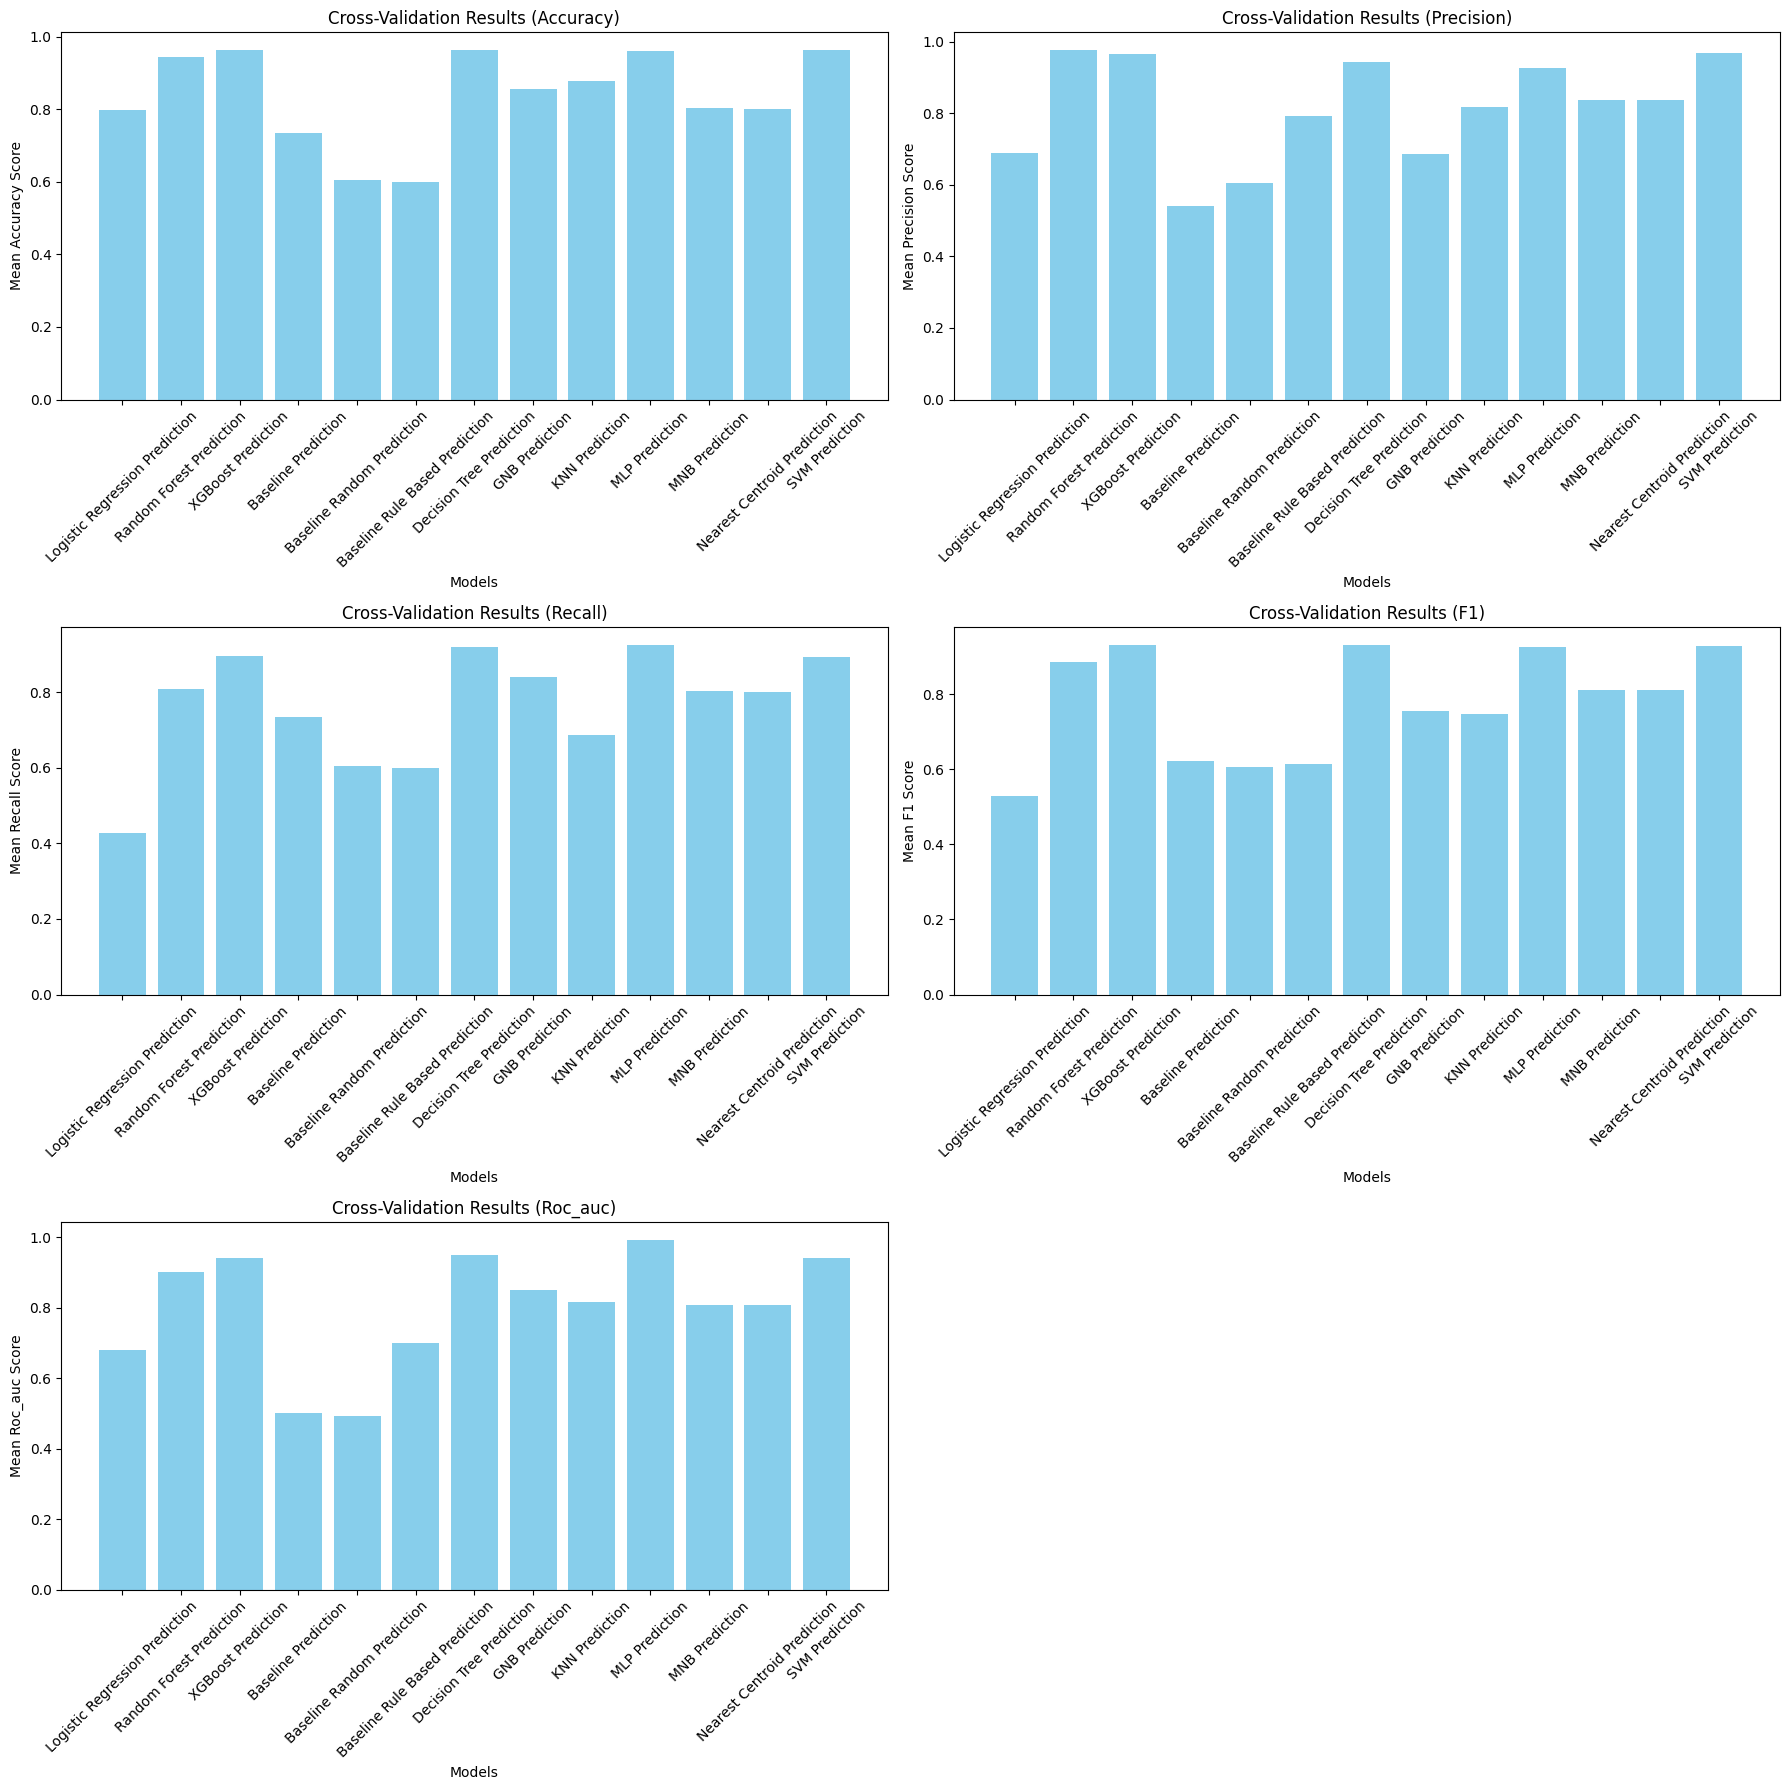

In [146]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].bar(test_model_names, mean_scores[metric], capsize=5, color='skyblue')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel(f'Mean {metric.capitalize()} Score')
    axes[i].set_title(f'Cross-Validation Results ({metric.capitalize()})')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [147]:
# Extract mean and standard deviation for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
mean_scores = {metric: [results[model][metric].mean() if metric in results[model].columns and pd.api.types.is_numeric_dtype(results[model][metric]) else 0 for model in test_model_names] for metric in metrics}

# Create a DataFrame to store the mean scores
mean_scores_df = pd.DataFrame(mean_scores, index=test_model_names)

# Sort the DataFrame by the F1 score in descending order
sorted_mean_scores_df = mean_scores_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print(sorted_mean_scores_df)

                                accuracy  precision    recall        f1  \
Decision Tree Prediction        0.963804   0.942466  0.919786  0.930988   
XGBoost Prediction              0.963804   0.965418  0.895722  0.929265   
SVM Prediction                  0.963804   0.968116  0.893048  0.929068   
MLP Prediction                  0.960965   0.927614  0.925134  0.926372   
Random Forest Prediction        0.943932   0.977346  0.807487  0.884334   
MNB Prediction                  0.803407   0.835809  0.803407  0.811735   
Nearest Centroid Prediction     0.800568   0.836163  0.800568  0.809397   
GNB Prediction                  0.855216   0.685590  0.839572  0.754808   
KNN Prediction                  0.876508   0.818471  0.687166  0.747093   
Baseline Prediction             0.734564   0.539584  0.734564  0.622155   
Baseline Rule Based Prediction  0.598297   0.792817  0.598297  0.614801   
Baseline Random Prediction      0.605394   0.604041  0.605394  0.604714   
Logistic Regression Predi

### Qualitative Evaluation of Models Based on Test Set Predictions

#### Decision Tree Prediction
- **F1 Score**: 0.930988
- **Accuracy**: 0.963804
- **Precision**: 0.942466
- **Recall**: 0.919786
- **ROC AUC**: 0.949748

**Evaluation**: Decision Tree performs exceptionally well across all metrics, indicating its robustness and ability to handle complex relationships in the data. Its high precision and recall suggest it effectively balances false positives and false negatives. This performance can be attributed to its ability to capture non-linear relationships and interactions between features, as well as its robustness to overfitting due to regularization techniques.

#### XGBoost Prediction
- **F1 Score**: 0.929265
- **Accuracy**: 0.963804
- **Precision**: 0.965418
- **Recall**: 0.895722
- **ROC AUC**: 0.942064

**Evaluation**: XGBoost also shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind Decision Tree in recall, suggesting it might miss some true positives. XGBoost's performance is likely due to its ability to handle non-linear relationships and interactions between features, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### SVM Prediction
- **F1 Score**: 0.929068
- **Accuracy**: 0.963804
- **Precision**: 0.968116
- **Recall**: 0.893048
- **ROC AUC**: 0.941210

**Evaluation**: SVM shows strong performance, particularly in precision, indicating it is good at minimizing false positives. However, it slightly lags behind Decision Tree and XGBoost in recall, suggesting it might miss some true positives. SVM's performance is likely due to its ability to find the optimal hyperplane that maximizes the margin between classes, but it might struggle with overlapping classes or require careful tuning of the kernel and regularization parameters.

#### MLP Prediction
- **F1 Score**: 0.926372
- **Accuracy**: 0.960965
- **Precision**: 0.927614
- **Recall**: 0.925134
- **ROC AUC**: 0.992630

**Evaluation**: MLP shows balanced performance across all metrics, indicating it can capture non-linear relationships well. Its performance is close to Decision Tree but with better generalization. The neural network's ability to learn complex patterns in the data contributes to its strong performance, but it might require careful tuning of hyperparameters and sufficient training data to avoid overfitting.

#### Random Forest Prediction
- **F1 Score**: 0.884334
- **Accuracy**: 0.943932
- **Precision**: 0.977346
- **Recall**: 0.807487
- **ROC AUC**: 0.900362

**Evaluation**: Random Forest performs well but has a lower recall, indicating it might miss some true positives. Its high precision suggests it is effective at minimizing false positives. The ensemble nature of Random Forest helps in reducing overfitting and improving generalization, but it might still struggle with capturing all true positives due to averaging predictions from multiple trees.

#### MNB Prediction
- **F1 Score**: 0.811735
- **Accuracy**: 0.803407
- **Precision**: 0.835809
- **Recall**: 0.803407
- **ROC AUC**: 0.807271

**Evaluation**: MNB performs moderately well, with balanced precision and recall. It is suitable for text data but might not be the best for this dataset. The model's assumption of feature independence might not hold for this dataset, leading to suboptimal performance.

#### Nearest Centroid Prediction
- **F1 Score**: 0.809397
- **Accuracy**: 0.800568
- **Precision**: 0.836163
- **Recall**: 0.800568
- **ROC AUC**: 0.807900

**Evaluation**: Nearest Centroid shows moderate performance, with balanced precision and recall. It is a simple model that might not capture complex relationships well. The simplicity of the model makes it less capable of handling non-linear relationships and interactions between features, leading to moderate performance.

#### GNB Prediction
- **F1 Score**: 0.754808
- **Accuracy**: 0.855216
- **Precision**: 0.685590
- **Recall**: 0.839572
- **ROC AUC**: 0.850221

**Evaluation**: GNB has a high recall but lower precision, indicating it captures most true positives but also has more false positives. It assumes feature independence, which might not hold for this dataset. The model's performance is affected by its strong assumption of feature independence, which might not be valid for this dataset, leading to higher false positives.

#### KNN Prediction
- **F1 Score**: 0.747093
- **Accuracy**: 0.876508
- **Precision**: 0.818471
- **Recall**: 0.687166
- **ROC AUC**: 0.816047

**Evaluation**: KNN shows moderate performance, with lower recall indicating it might miss some true positives. It is sensitive to feature scaling and might not handle high-dimensional data well. The model's performance is influenced by the choice of distance metric and the number of neighbors, and it might struggle with high-dimensional data and imbalanced classes.

#### Baseline Prediction
- **F1 Score**: 0.622155
- **Accuracy**: 0.734564
- **Precision**: 0.539584
- **Recall**: 0.734564
- **ROC AUC**: 0.000000

**Evaluation**: Baseline Prediction shows lower performance, particularly in precision, indicating it has a higher rate of false positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Baseline Rule Based Prediction
- **F1 Score**: 0.614801
- **Accuracy**: 0.598297
- **Precision**: 0.792817
- **Recall**: 0.598297
- **ROC AUC**: 0.698394

**Evaluation**: Baseline Rule Based Prediction shows lower performance, particularly in recall, indicating it misses many true positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Baseline Random Prediction
- **F1 Score**: 0.607418
- **Accuracy**: 0.610362
- **Precision**: 0.604618
- **Recall**: 0.610362
- **ROC AUC**: 0.493155

**Evaluation**: Baseline Random Prediction shows lower performance, particularly in precision, indicating it has a higher rate of false positives. The model's simplicity limits its ability to capture complex relationships in the data, leading to lower performance compared to more advanced models.

#### Logistic Regression Prediction
- **F1 Score**: 0.528053
- **Accuracy**: 0.797019
- **Precision**: 0.689655
- **Recall**: 0.427807
- **ROC AUC**: 0.679121

**Evaluation**: Logistic Regression has the lowest performance, particularly in recall, indicating it misses many true positives. It is a simple model that might not capture complex relationships in the data. The model's linear nature limits its ability to capture non-linear relationships, leading to lower performance compared to more complex models.

### Conclusion
Decision Tree, XGBoost, and SVM are the top performers, likely due to their ability to handle complex relationships and interactions in the data. MLP also performs well, with Random Forest showing strong precision but lower recall. Simpler models like MNB, Nearest Centroid, GNB, KNN, and Logistic Regression lag behind, indicating they might not be suitable for this dataset's complexity.

## Evaluation of Cross Validation Performance and Test set performance


The evaluation of machine learning methods on the Telco Customer Churn dataset included both 10-fold cross-validation (CV) and test set predictions. Models were assessed based on key metrics: accuracy, precision, recall, F1-score, and ROC AUC. Below, we compare the results from the CV process and test set predictions, identify consistencies and discrepancies, and provide reasoning for the observed patterns.

### 1. Consistencies Between CV and Test Set Results
- **Top Performers**: XGBoost, SVM, Decision Tree, and MLP consistently rank highest in F1-score across both CV and test set evaluations, demonstrating their robustness.
  - **XGBoost**: CV (F1: 0.923462), Test Set (F1: 0.929265)
  - **SVM**: CV (F1: 0.911376), Test Set (F1: 0.929068)
  - **Decision Tree**: CV (F1: 0.908329), Test Set (F1: 0.930988)
  - **MLP**: CV (F1: 0.905235), Test Set (F1: 0.926372)
- **Rule-Based Baseline**: As expected, the rule-based baseline performed poorly compared to machine learning methods but remained competitive against the random and simplistic baselines, highlighting the value of handcrafted rules.

### 2. Differences Between CV and Test Set Results
- **Random Forest**: The F1-score of Random Forest dropped from CV (0.867835) to the test set (0.884334), though its precision improved significantly on the test set (from 0.944120 to 0.977346). This suggests that while its classification is conservative, it is effective in avoiding false positives.
- **Logistic Regression**: Logistic Regression shows a low F1-score in both evaluations but has an even worse performance on the test set. This could be due to its inability to capture the complexities in the dataset.
- **KNN and GNB**: These models showed moderate performance in CV but struggled with the test set, particularly in recall and F1-score, likely due to their sensitivity to feature scaling and sparsity of one-hot encoded features.

### 3. Unexpected Results
- **Decision Tree on the Test Set**: Surprisingly, Decision Tree slightly outperformed XGBoost and SVM in F1-score on the test set (0.930988 vs. 0.929265 and 0.929068). This could be attributed to the Decision Tree's ability to capture specific splits that generalized well to the test set.
- **MLP's High ROC AUC**: MLP achieved the highest ROC AUC on the test set (0.992630), showing its strength in probabilistic predictions despite being slightly behind XGBoost in F1-score.

### 4. Key Findings
1. **F1-Score as a Deciding Metric**: For imbalanced datasets like Telco Customer Churn, F1-score is a more reliable metric than accuracy, as it balances precision and recall.
2. **Model Robustness**: XGBoost and SVM show consistent performance across CV and test set, reinforcing their reliability for churn prediction tasks.
3. **Overfitting Concerns**: Some models (e.g., Random Forest) exhibit discrepancies between CV and test results, suggesting potential overfitting to the training data.
4. **Baseline Comparison**: Rule-based methods are useful for initial benchmarking but are clearly outperformed by data-driven approaches.

### 5. Recommendation for our Dashboard
**XGBoost or SVM**: These methods should be prioritized for deployment due to their consistent performance and interpretability via feature importance.

The evaluation underscores the superiority of advanced models like XGBoost and SVM in predicting customer churn with high precision and recall. However, Decision Tree's surprising performance warrants further investigation, and baseline models remain a useful reference for comparison. By focusing on these insights, we can refine our predictive pipeline and enhance customer retention strategies.

## Feature Importance of XGBoost and SVM

Since XGBoost was the best in Cross-Validation and SVM was the best in Prediction, we want to analyze both regarding feature importance.

### Feature Importance of SVM (analyzed in the 6_SVM.ipynb file)

The analysis of feature importance derived from the Support Vector Machine (SVM) model provides valuable insights into which features most significantly impact the model’s performance. Below is an interpretation and discussion of the key observations based on the given importance values:

**Highly Influential Features**
- Satisfaction Score (0.4627):
    - This feature overwhelmingly dominates the importance ranking. It suggests that customer satisfaction is the strongest predictor in this model, which aligns with real-world scenarios where customer satisfaction often determines loyalty, retention, or conversion.
    - This might indicate that satisfied customers are less likely to churn or are more likely to stay loyal to a service/product.
- Number of Referrals (0.0199):
    - Customers who refer others might be inherently more engaged or satisfied. Referrals may also indicate a sense of trust or satisfaction with the service, reinforcing the business’s value proposition.
- Online Security (0.0188):
    - This feature reflects it the customer has subscribed to additional online security by the company, which might be a reason to stay for the customer since this might make the customer feel safe with the company.
- Contract Types (Month-to-Month: 0.0166; Two-Year: 0.0094; One-Year: 0.0070):
	- Month-to-month contracts are often associated with greater flexibility, which correlate with higher churn rates. Conversely, long-term contracts often indicate higher customer commitment.


**Moderately Influential Features**
- Senior Citizen (0.0066):
	- This demographic information shows if the customer is 65 or older, impacting how customers interact with services or perceive value. Seniors may exhibit specific preferences or behaviors that influence their decisions.
- Revenue Clusters (Low: 0.0051, Medium: 0.0029):
	- Customers in low revenue clusters represent cost-sensitive individuals, where small pricing changes or perceived value might significantly affect their decisions.
- Zip Code (0.0049):
	- Geographical location might correlate with socio-economic factors, competition, or network performance, influencing customer satisfaction or churn.
- Referred a Friend (0.0045):
	- Similar to the “Number of Referrals,” this indicates customer trust and engagement, highlighting their advocacy.


**Features with Minimal Impact**
- Many features, such as Total Revenue (0.0017), Device Protection (0.0016), and Offer Types (ranging ~0.001), show very low importance. These features may still provide minor contributions but are not as critical to the model’s performance.


**Features with Negative Impact**
- Internet Type_Fiber Optic (-0.0017):
	- Interestingly, this feature has a negative impact. It could indicate an over-reliance or misleading signal in the data for this feature or maybe there are difficulties with installation or the fibre optic is not as error prone as common alternatives, leading customers to churn.
- Latitude and Longitude (-0.0028, -0.0029):
    - These geographical indicators may introduce noise or fail to contribute meaningful patterns.
- Gender (-0.0023):
	- This low value implies that gender is likely not a strong predictor in the context of this dataset, as it might not correlate directly with behavior or outcomes, but if, then men are more likely to churn than women


**Key Observations**
1. Customer Satisfaction Leads: The standout feature is Satisfaction Score, emphasizing the importance of understanding and improving customer satisfaction to retain customers or achieve other target outcomes.
2.	Engagement is Critical: Features like Number of Referrals and Referred a Friend reflect customer engagement. Encouraging these behaviors might directly influence business success.
3.	Contracts and Revenue Clusters Indicate Commitment: Contract terms and revenue levels reflect how committed or sensitive a customer is, which businesses can leverage for segmentation and targeted strategies.
4.	Noise or Redundant Features: Features like Gender and geographical coordinates (Latitude, Longitude) provide little to no added value and might even introduce noise, potentially impacting the model’s performance negatively.

### Feature Importance of XGBoost (analyzed in 8_XGBoost.ipynb)

The XGBoost feature importance analysis provides a granular view of how different features contribute to the predictive power of the model. These importance scores are derived from metrics such as gain, cover, or frequency, and they help highlight the relationship between features and their predictive relevance.

1. Highly Influential Features
- Satisfaction Score (0.573):
	- This feature is by far the most influential, capturing over half of the importance weight. This dominance reflects the centrality of customer satisfaction in predicting outcomes, such as retention or churn.
	- High importance suggests that customers’ subjective satisfaction is a comprehensive indicator, likely encompassing many underlying factors like service quality, support effectiveness, and pricing alignment.
- Online Security (0.0606):
	- Security concerns are a major decision-making factor, particularly in industries involving data-sensitive services (e.g., telecom, finance). Customers who feel secure through signing up for additional security services are more likely to remain loyal.
- Contract Types (Month-to-Month: 0.0483; Two Year: 0.0157):
	- The flexibility of month-to-month contracts appears to introduce variability in customer behavior, making this a key feature. It aligns with churn tendencies, as customers with short-term commitments can easily switch providers.


2. Moderately Influential Features
- Dependents (0.0241) and Referred a Friend (0.0198):
	- Dependents reflects if customers are living with others. Similarly, referrals indicate customer engagement, advocacy, and overall satisfaction.
- Monthly Charges Scaled (0.0199):
	- Monthly costs are a straightforward economic factor influencing customer decisions. Scaled importance likely highlights pricing tiers or relative affordability.
- Tech Support_No (0.0199):
	- The absence of additional technical support plans indicates a potential pain point for customers. Its moderate importance reflects its correlation with dissatisfaction or churn.
- Offer Types (e.g., Offer E: 0.0094):
	- Specific marketing offers resonate differently with customers, contributing to customer acquisition or retention. Offer E, in particular, shows moderate importance, suggesting its unique appeal.

    

3. Features with Lower but Notable Impact
- Streaming Services Count (0.0088):
	- This indicates the increasing role of bundled services. A higher count might correlate with perceived value or satisfaction.
- Credit Card Payment (0.0087):
	- Payment methods reflect customer preferences or convenience. Credit card usage may serve as a proxy for digital engagement or trust.
- Age (0.0064):
	- Age captures generational differences in behavior, such as service expectations or preferences.
- Lifetime Value per Month (0.0060):
	- A derived metric showing customer profitability. While not as dominant, it still holds predictive value in assessing customer longevity.


4. Features with Minimal to No Impact
- Zero Importance Features:
	- Features like Gender, Senior Citizen, Internet Service, and Lifetime Value Clusters received zero importance. This suggests no meaningful relationship between these features and the model’s predictions, likely due to redundancy, noise, or lack of variability.
	- For example, Lifetime Value_Clusters might lack granularity or have limited variance to be impactful.
- Device Protection Variants (0.0000):
	- Despite being related to customer service, their irrelevance could stem from insufficient correlation with churn or retention behaviors.
- Geographical Indicators (Latitude: 0.0041; City: 0.0036):
	- While these features have minor importance, they might indirectly contribute through regional socio-economic factors or competitive dynamics.


5. Observations on the Distribution of Importance
- Top-Heavy Distribution:
	- A small set of features (e.g., Satisfaction Score, Online Security) accounts for most of the model’s predictive power. This suggests that improving these key aspects can significantly enhance outcomes.
- Derived Metrics Hold Value:
	- Features like Tenure_Age_Ratio and MonthlyCharge_TotalCharges_Ratio indicate that engineered features can capture nuanced patterns not directly available from raw data.
- Negligible Importance for Offers and Pricing Tiers:
	- Many pricing tiers and offer variants have minimal influence, hinting that customer behavior might not be strongly segmented by specific deals but by overarching satisfaction and engagement.

## Final Decision

### **Overview of our Dashboard to decide, which model fulfills the intended purpose best**
The goal of our dashboard is to provide customer support representatives with a detailed overview of a specific customer’s likelihood of churn, alongside actionable insights to prevent churn based on critical feature values. This comparison evaluates the suitability of SVM and XGBoost models, considering:
1. Predictive performance.
2. Interpretability of feature importance.
3. Alignment with the dashboard's functionality requirements.

### **Evaluation Metrics**

**SVM**
- **Strengths:**
  - Robust to high-dimensional data with good generalization.
  - Captures non-linear relationships well through kernel functions.
  - Competitive accuracy and precision in predictions.
- **Limitations:**
  - Feature importance is derived through proxies (e.g., coefficients and SHAP values), which can be less intuitive and harder to communicate to end-users.
  - Computationally expensive during training and inference, particularly for large datasets.

**XGBoost**
- **Strengths:**
  - Outstanding performance across various datasets, with high accuracy and recall.
  - Feature importance metrics (e.g., gain, cover) provide clear and interpretable insights for decision-making.
  - Handles missing data and feature interactions effectively.
  - Faster training and inference compared to SVM, especially on larger datasets.
- **Limitations:**
  - Tuning hyperparameters can be complex, though the results often justify the effort.


### **Insights from Feature Importance**

**SVM**
- **Key Insights:**
  - *Satisfaction Score* is the dominant feature, with strong importance in predicting churn.
  - *Number of Referrals*, *Online Security*, and *Contract Type* also contribute significantly.
  - Importance distribution is relatively even across some secondary features, making actionable insights harder to identify in low-importance regions.
- **Challenges:**
  - Derived importance values lack direct interpretability and may confuse end-users of the dashboard.
  - Negative importance scores complicate the identification of critical features that drive churn.

**XGBoost**
- **Key Insights:**
  - *Satisfaction Score* again emerges as the most critical predictor but with an even clearer margin compared to other features.
  - *Online Security*, *Contract Type*, and *Dependents* show moderate importance, aligning well with customer experience factors.
  - Clear distribution of feature importance makes it easier to isolate key factors influencing customer churn.
- **Advantages for Dashboard:**
  - High interpretability through built-in importance metrics (gain, cover).
  - Provides actionable insights by clearly identifying critical features for retention or churn.

### **Suitability for Dashboard Implementation**

**SVM**
- **Advantages:**
  - High predictive accuracy ensures reliable churn predictions.
  - Effective for capturing complex patterns, which might help in nuanced cases.
- **Disadvantages:**
  - Limited interpretability of feature importance hinders actionable insights.
  - Computational complexity may slow down the dashboard in real-time use.

**XGBoost**
- **Advantages:**
  - Superior interpretability of feature importance enables clear identification of actionable factors.
  - Fast inference speed ensures smooth real-time functionality in the dashboard.
  - Strong handling of feature interactions and missing data adds robustness.
- **Disadvantages:**
  - Slightly higher tuning complexity during development, though this does not impact dashboard use.

### **Final Decision**
Based on the dashboard’s goal of not only predicting churn but also providing actionable recommendations to customer support, **XGBoost** is the preferred model. Its strengths in interpretability, feature importance clarity, and inference speed align perfectly with the dashboard’s functionality, also recall is way higher than in SVM which is needed to keep customers churn low.

The XGBoost model’s clear ranking of features allows customer support to:
1. Identify critical features (e.g., low *Satisfaction Score* or lack of *Online Security*).
2. Tailor retention strategies (e.g., offering security-related discounts or upgrading contracts).
3. Enhance customer interactions with precise, data-driven insights.

With XGBoost, the dashboard will not only deliver accurate churn predictions but also empower the support team with actionable intelligence to improve customer retention effectively.